<a href="https://colab.research.google.com/github/Kimuramoro/EnvDatSci/blob/main/RAGU24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages(c("netassoc","readxl","dplyr","lubridate","sp","FNN","sf"))
library(netassoc)   #damn this takes forever, maybe dont bother loading this in while preprocessing
library(readxl)
library(dplyr)
library(lubridate)
library(sp)
library(FNN)
library(sf)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘RcppEigen’, ‘permute’, ‘e1071’, ‘wk’, ‘igraph’, ‘infotheo’, ‘corpcor’, ‘huge’, ‘vegan’, ‘classInt’, ‘s2’, ‘units’


Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: infotheo


Attaching package: ‘dplyr’


The following objects are masked from ‘package:igraph’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:igraph’:

    %--%, union


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching pac

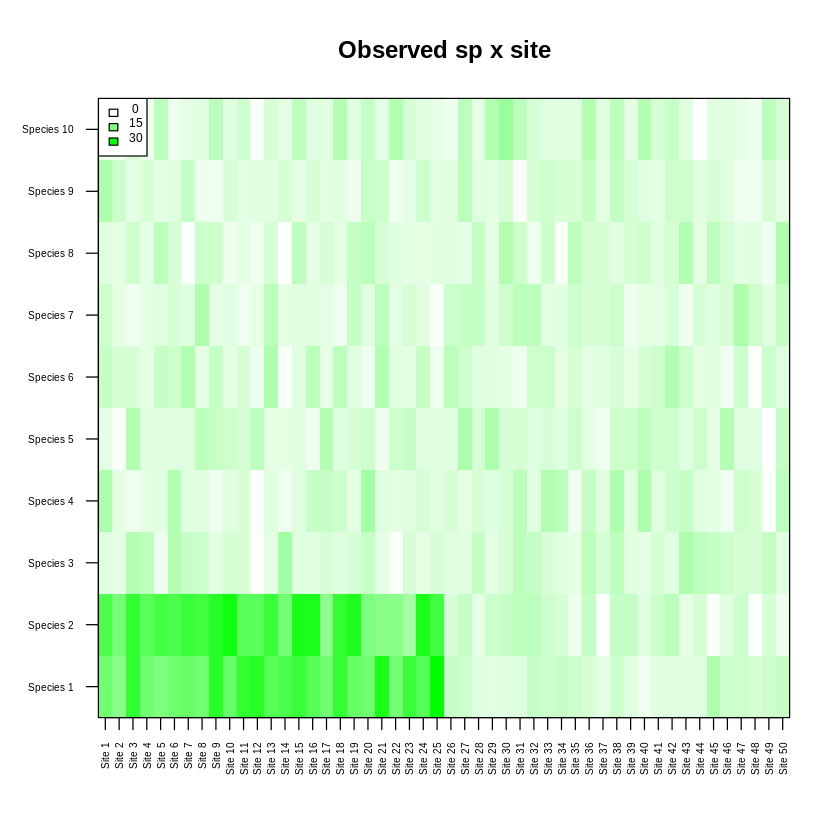

Calculating observed co-occurrence scores...


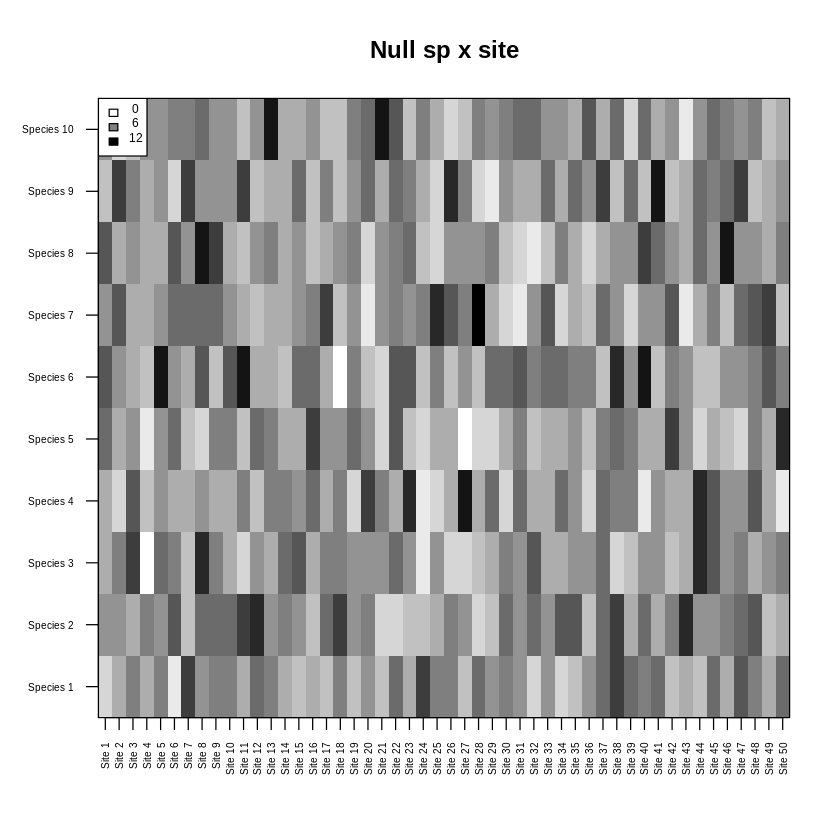

Generating null replicate 1...
Generating null replicate 2...
Generating null replicate 3...
Generating null replicate 4...
Generating null replicate 5...
Generating null replicate 6...
Generating null replicate 7...
Generating null replicate 8...
Generating null replicate 9...
Generating null replicate 10...
Generating null replicate 11...
Generating null replicate 12...
Generating null replicate 13...
Generating null replicate 14...
Generating null replicate 15...
Generating null replicate 16...
Generating null replicate 17...
Generating null replicate 18...
Generating null replicate 19...
Generating null replicate 20...
Generating null replicate 21...
Generating null replicate 22...
Generating null replicate 23...
Generating null replicate 24...
Generating null replicate 25...
Generating null replicate 26...
Generating null replicate 27...
Generating null replicate 28...
Generating null replicate 29...
Generating null replicate 30...
Generating null replicate 31...
Generating null r

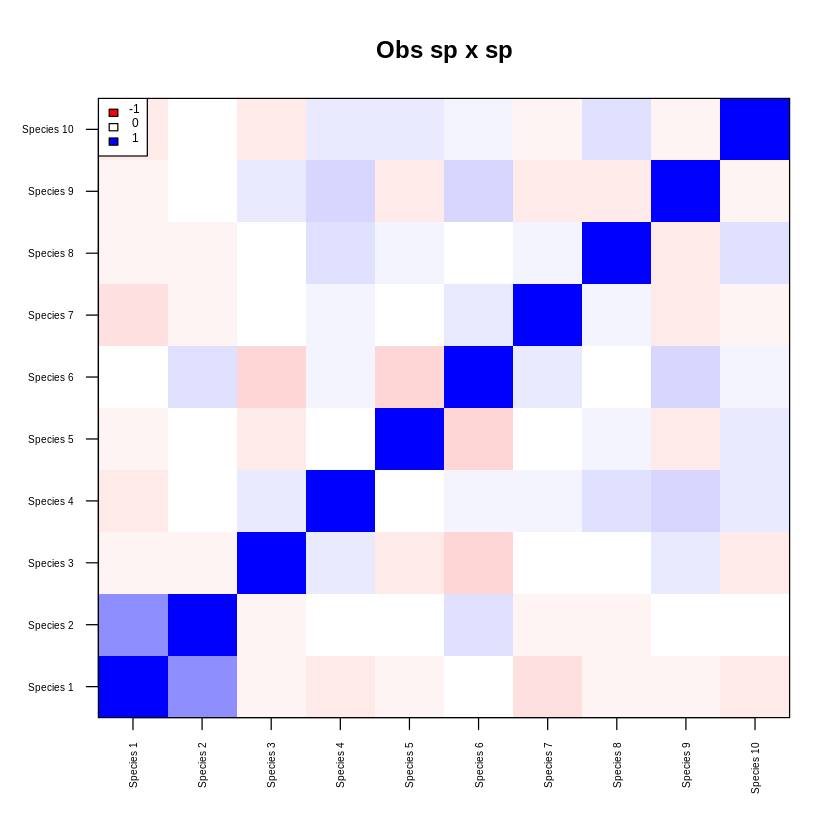

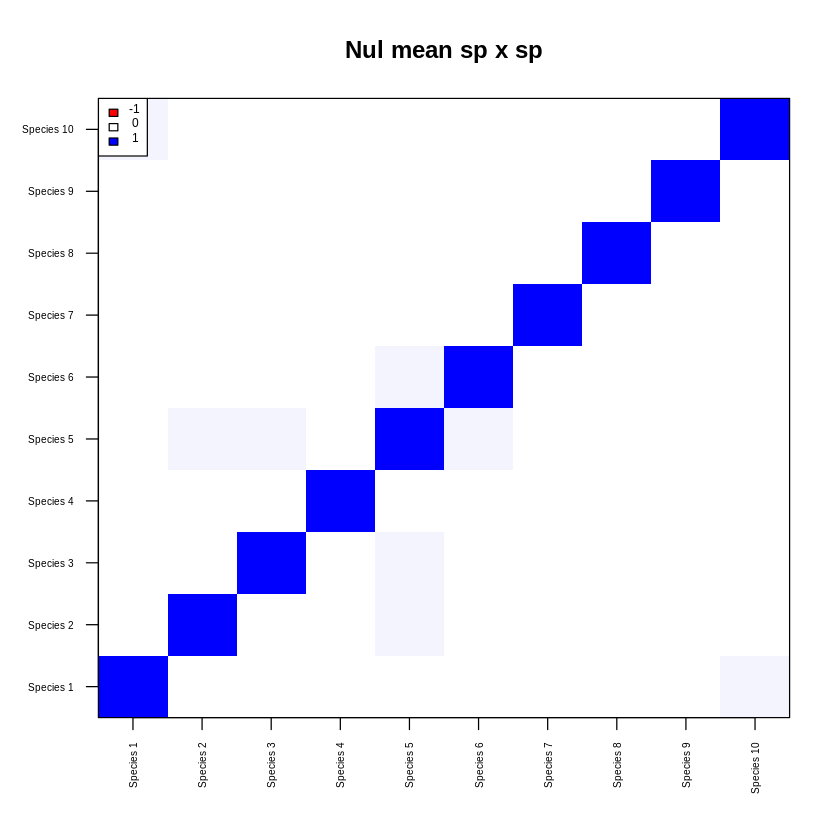

Adjusting p-values for multiple comparisons... 

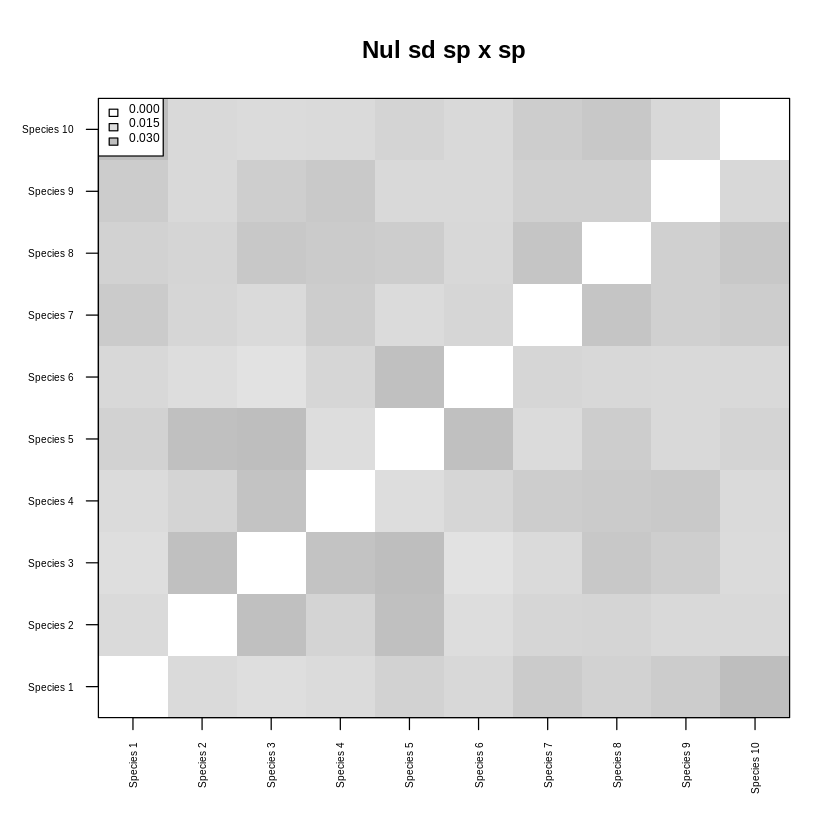

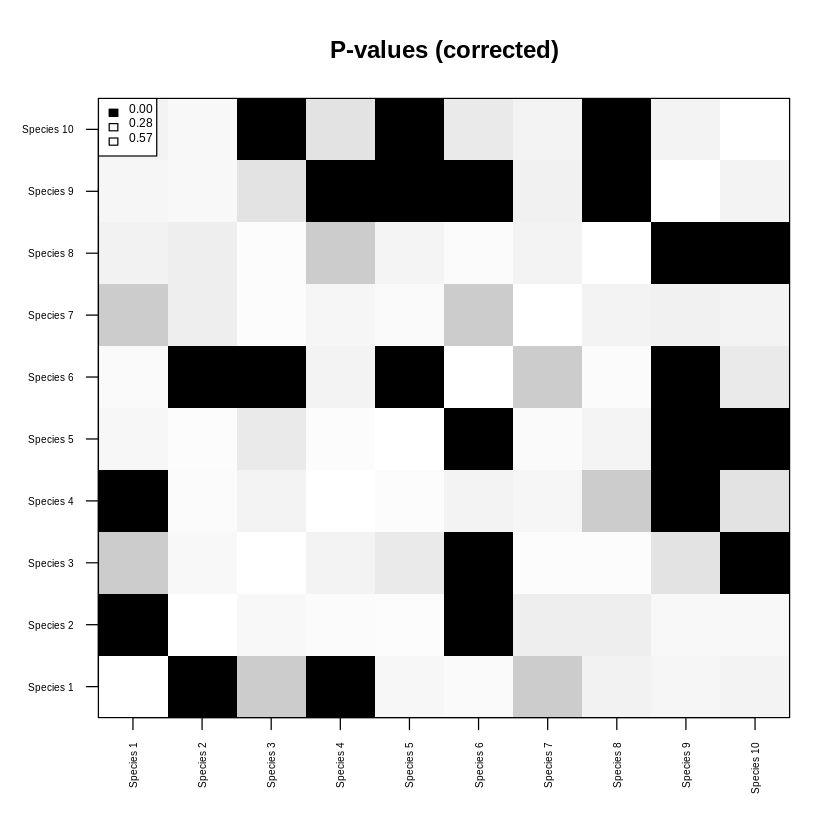

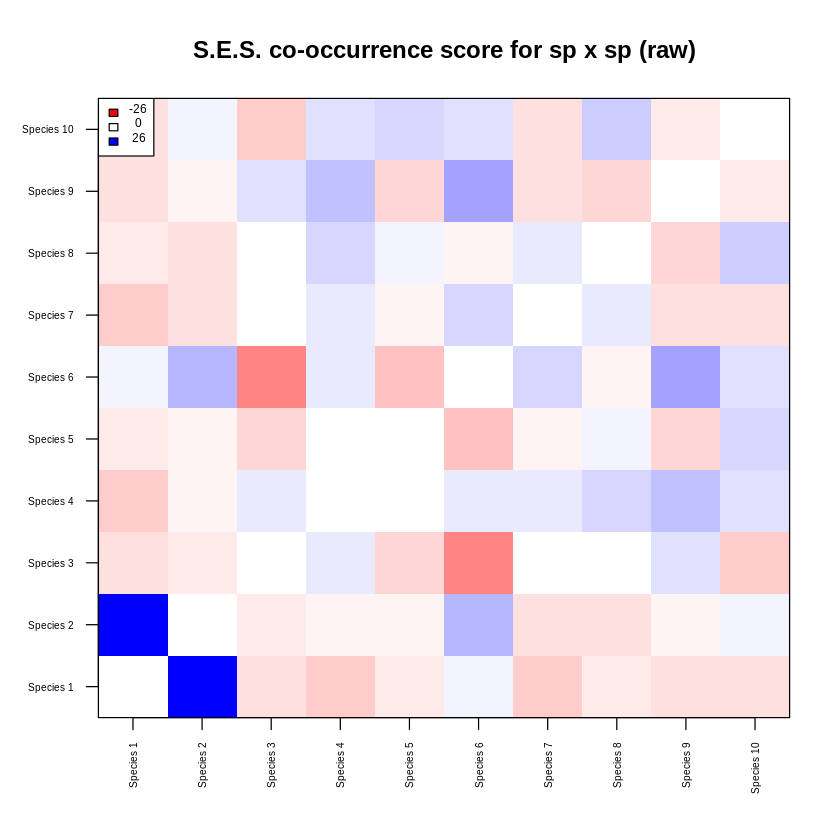

Building network...


Warning message:
“Non-positive edge weight found, ignoring all weights during graph layout.”


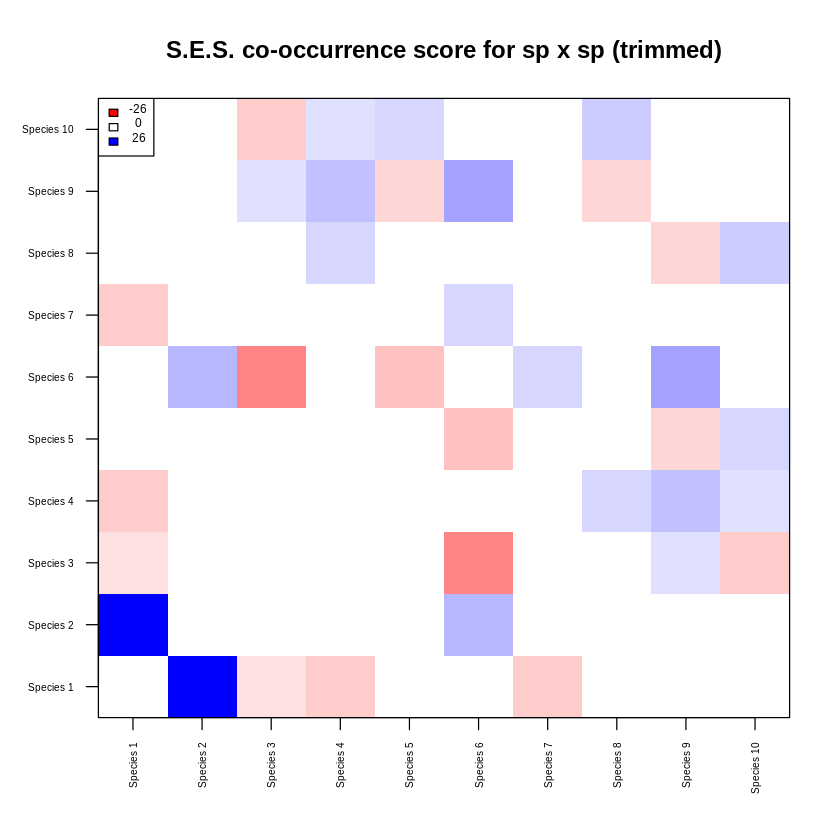

IGRAPH c9faec9 DNW- 10 20 -- 
+ attr: name (v/c), weight (e/n)
+ edges from c9faec9 (vertex names):
 [1] Species 1 ->Species 2  Species 2 ->Species 1  Species 2 ->Species 6 
 [4] Species 3 ->Species 9  Species 4 ->Species 8  Species 4 ->Species 9 
 [7] Species 4 ->Species 10 Species 5 ->Species 10 Species 6 ->Species 2 
[10] Species 6 ->Species 7  Species 6 ->Species 9  Species 7 ->Species 6 
[13] Species 8 ->Species 4  Species 8 ->Species 10 Species 9 ->Species 3 
[16] Species 9 ->Species 4  Species 9 ->Species 6  Species 10->Species 4 
[19] Species 10->Species 5  Species 10->Species 8 

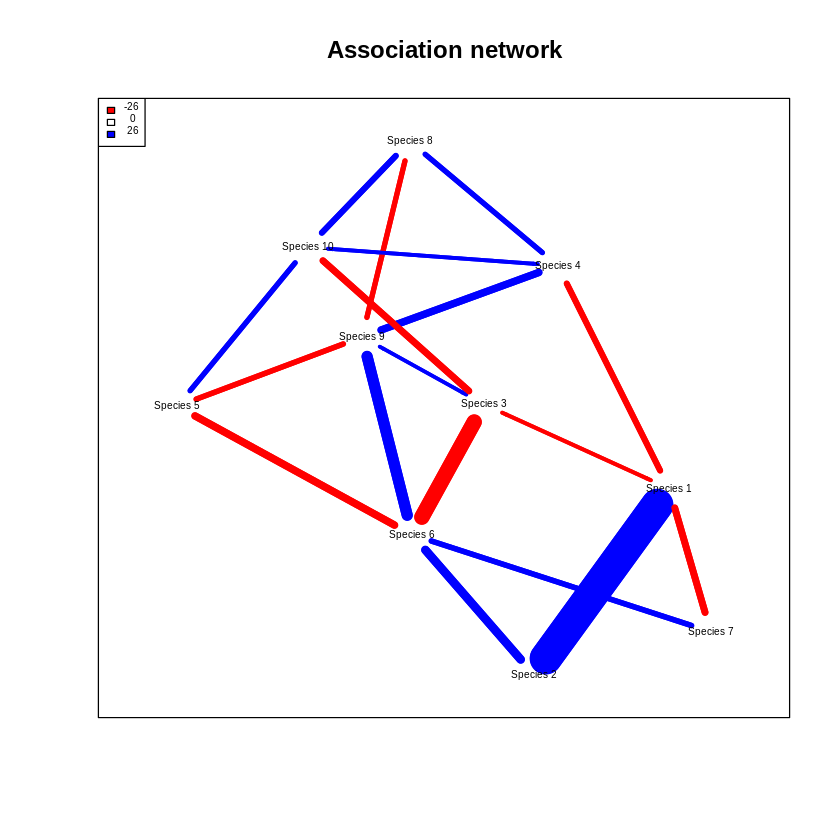

In [ ]:

set.seed(51)
nsp <- 10
nsi <- 50
m_obs <- floor(matrix(rpois(nsp*nsi,lambda=5),ncol=nsi,nrow=nsp))
m_nul <- floor(matrix(rpois(nsp*nsi,lambda=5),ncol=nsi,nrow=nsp))

m_obs[1,1:(nsi/2)] <- rpois(n=nsi/2,lambda=20)
m_obs[2,1:(nsi/2)] <- rpois(n=nsi/2,lambda=20)

n <- make_netassoc_network(m_obs, m_nul,
  method="partial_correlation",args=list(method="shrinkage"),
  p.method='fdr',
  numnulls=100, plot=TRUE,alpha=0.05)

# experimental demonstration of non-symmetric metrics
#n <- make_netassoc_network(m_obs, m_nul,
#  method="pairwise_association",args=list(method="condentropy"),
#  p.method='fdr',
#  numnulls=100, plot=TRUE,alpha=0.05)

n$network_all   #example


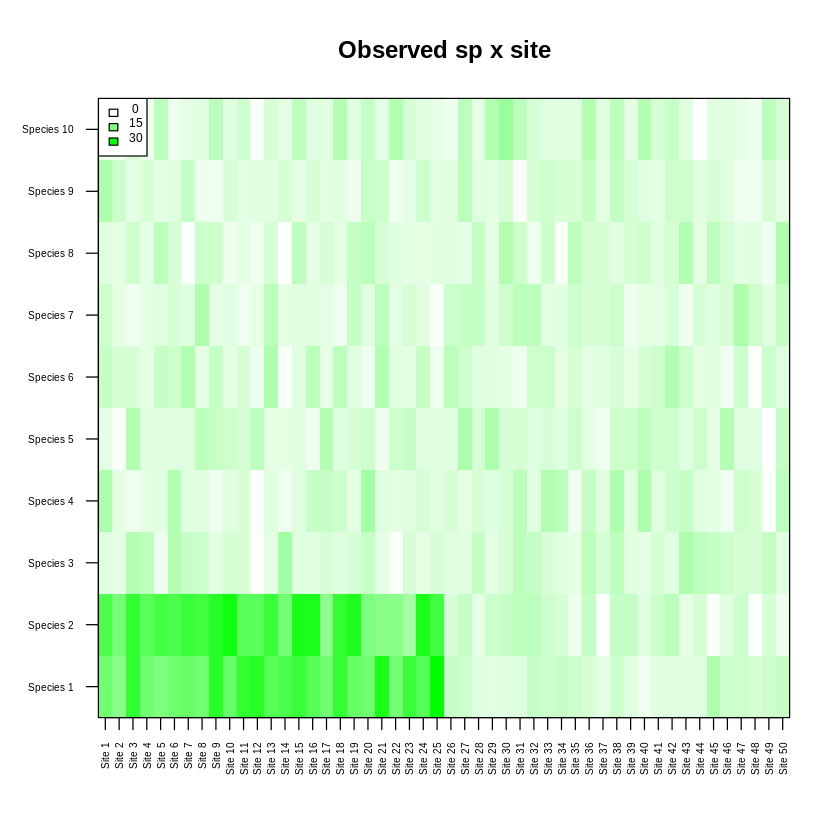

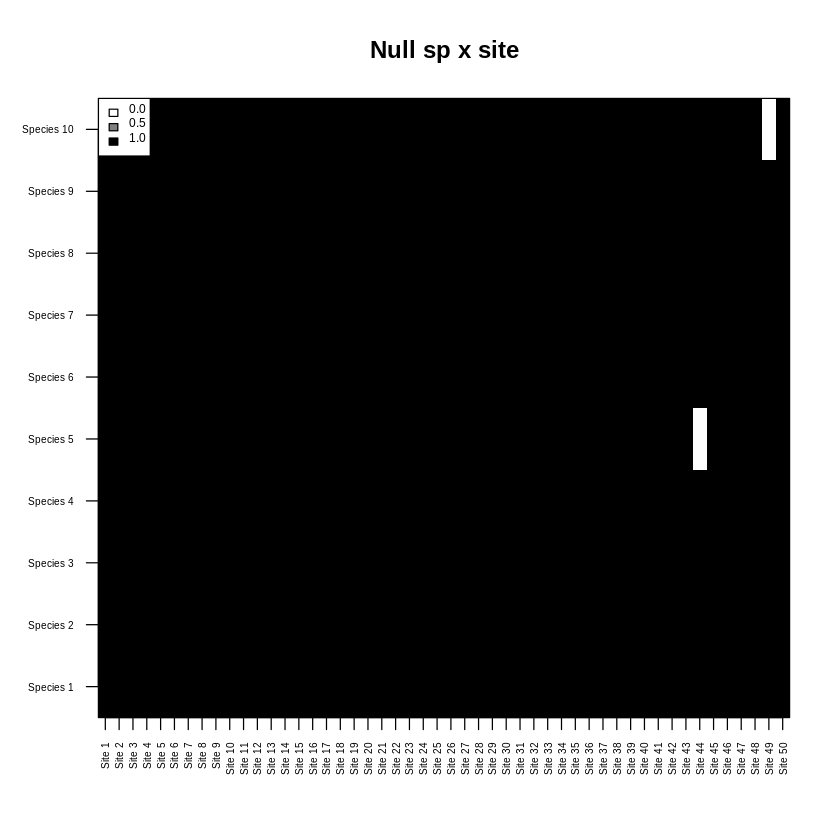

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

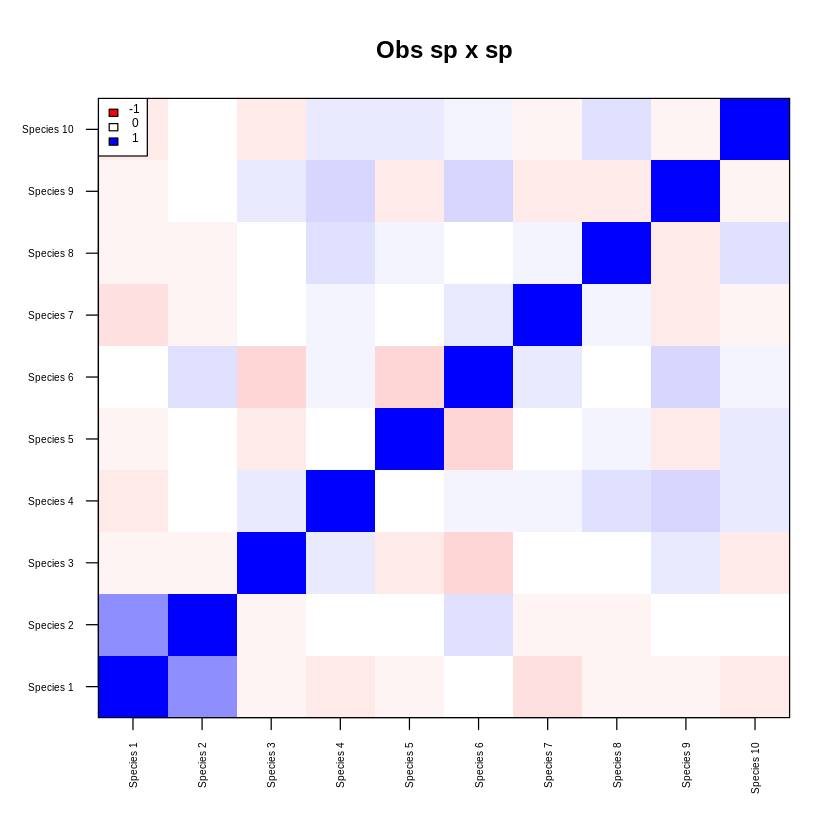

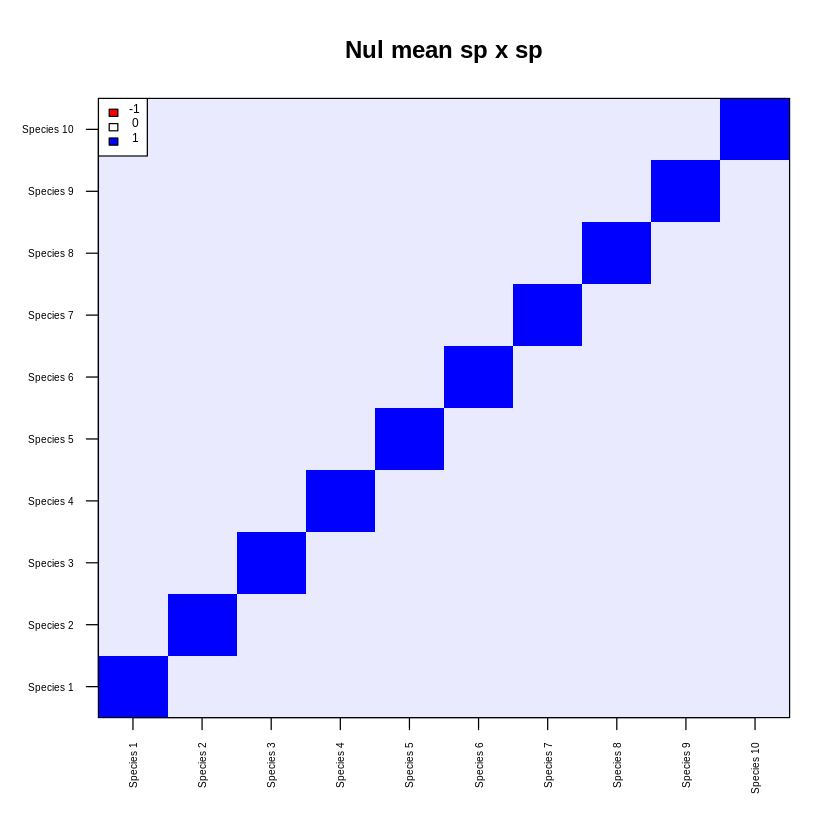

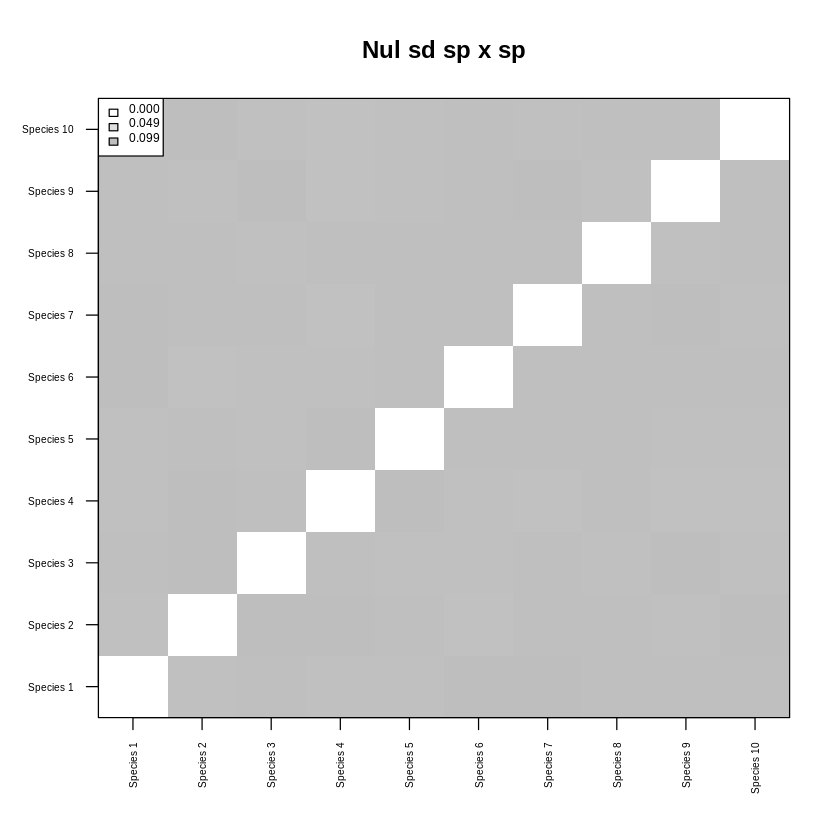

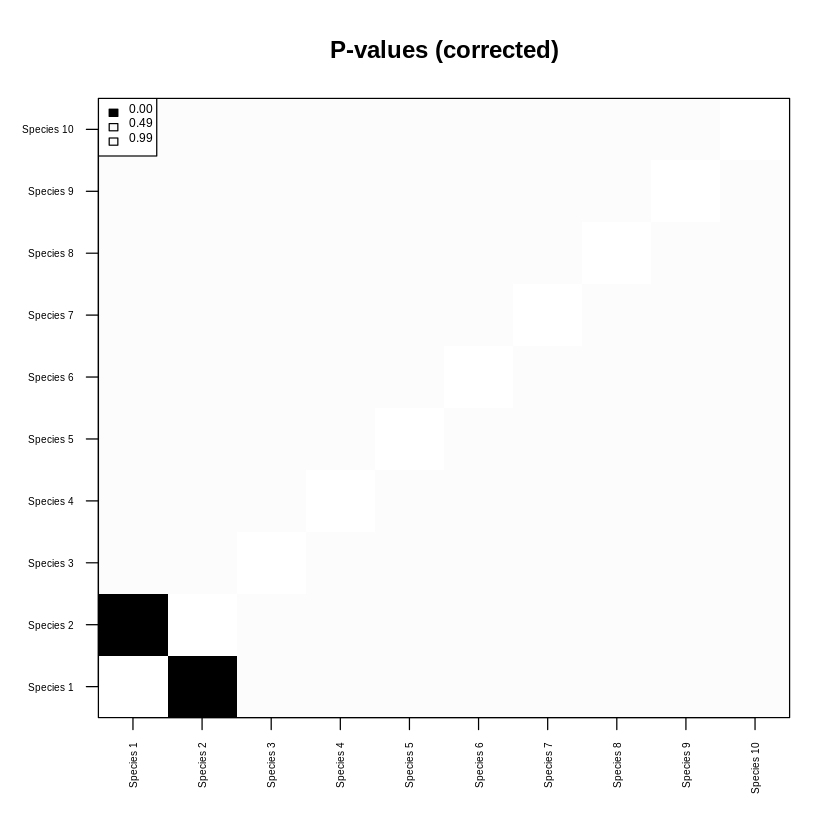

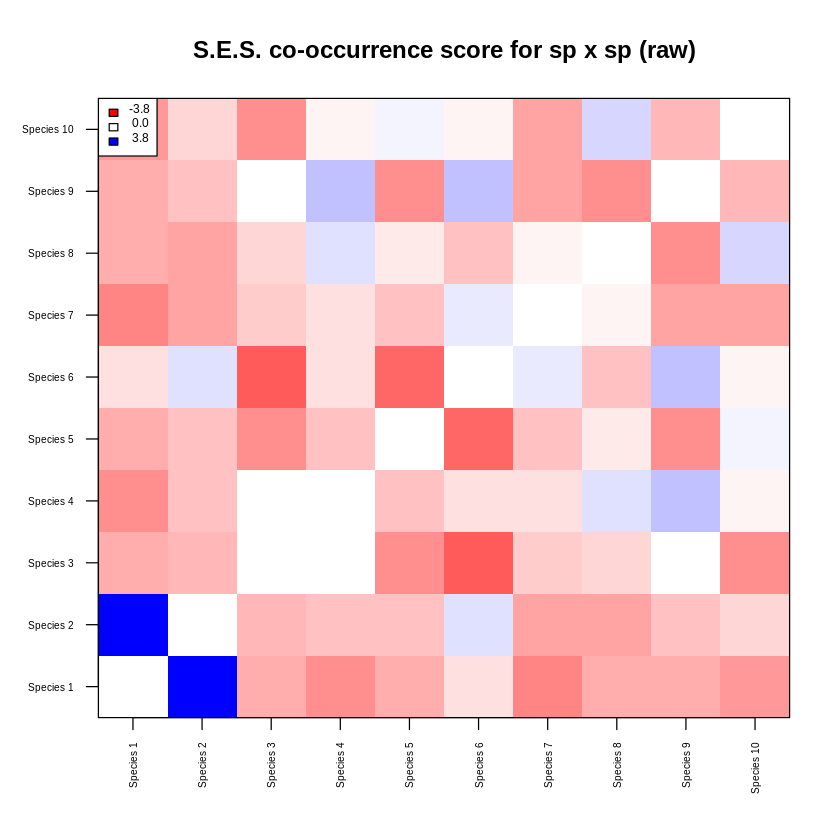

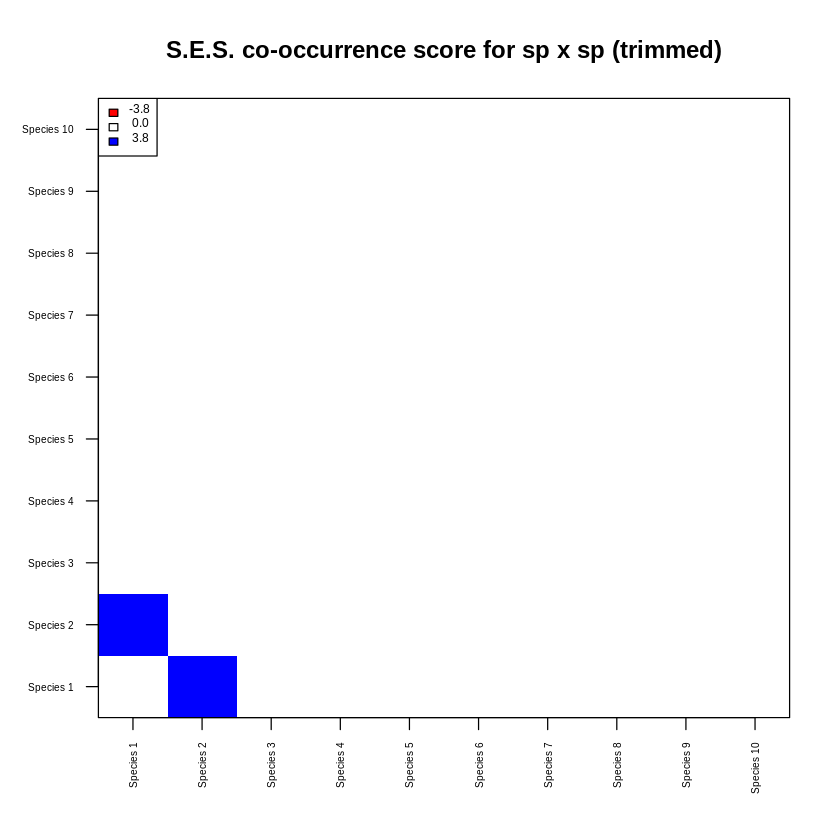

$matrix_spsite_obs
           Site 1 Site 2 Site 3 Site 4 Site 5 Site 6 Site 7 Site 8 Site 9
Species 1      17     14     24     17     15     17     18     16     25
Species 2      21     16     24     19     22     21     23     22     25
Species 3       4      3      9      8      2      9      7      6      3
Species 4      10      3      2      3      4      9      4      4      2
Species 5       3      1      9      4      4      4      4      8      7
Species 6       7      5      5      3      7      6      9      3      7
Species 7       6      3      2      3      4      5      4     10      3
Species 8       4      3      6      3      8      5      1      6      6
Species 9      10      6      3      5      3      4      7      2      2
Species 10      2      2      5      2      8      2      3      4      8
           Site 10 Site 11 Site 12 Site 13 Site 14 Site 15 Site 16 Site 17
Species 1       18      24      25      20      21      23      20      17
Species 2       2

IGRAPH 8a69f62 DNW- 10 36 -- 
+ attr: name (v/c), weight (e/n)
+ edges from 8a69f62 (vertex names):
 [1] Species 1->Species 2  Species 1->Species 3  Species 1->Species 4 
 [4] Species 1->Species 7  Species 2->Species 1  Species 2->Species 6 
 [7] Species 3->Species 1  Species 3->Species 6  Species 3->Species 9 
[10] Species 3->Species 10 Species 4->Species 1  Species 4->Species 8 
[13] Species 4->Species 9  Species 4->Species 10 Species 5->Species 6 
[16] Species 5->Species 9  Species 5->Species 10 Species 6->Species 2 
[19] Species 6->Species 3  Species 6->Species 5  Species 6->Species 7 
[22] Species 6->Species 9  Species 7->Species 1  Species 7->Species 6 
+ ... omitted several edges

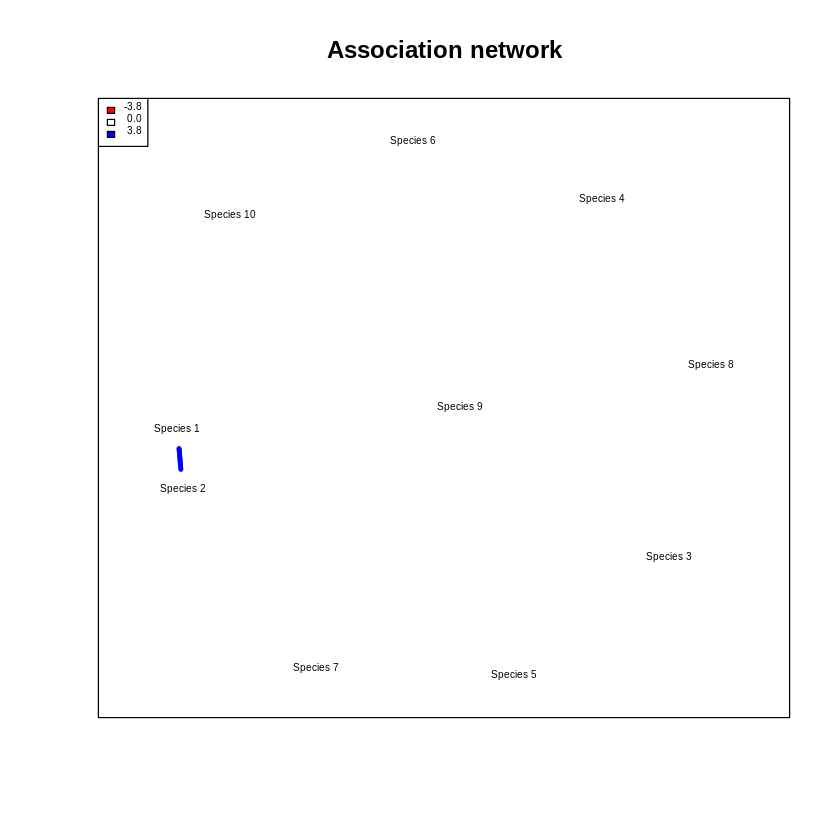

In [ ]:
make_netassoc_network(m_obs, nul=vegan::permatfull(m_obs,fixedmar="both",mtype="prab",times=100)$perm[[1]],
        method="partial_correlation",args=list(method="shrinkage"),
        p.method='fdr', numnulls=1000, plot=TRUE,alpha=1e-2,
        verbose=FALSE)


n$network_all  #example

In [2]:
bug_data <- read.csv("/content/AGU24_preprocessed_data")


In [3]:
glimpse(bug_data)

Rows: 149,536
Columns: 15
$ STATIONID               <chr> "19991017-1911-josecocco", "19991017-1911-jose…
$ Taxa.ID                 <chr> "Tipula", "Hydropsyche", "Clitellata", "Chiron…
$ Count                   <dbl> 4, 4, 1, 150, 1, 20, 1, 4, 8, 3, 6, 5, 1, 9, 1…
$ nTaxa                   <int> 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12…
$ HUC8                    <dbl> 2050201, 2050201, 2050201, 2050201, 2050201, 2…
$ SmallFrees              <dbl> 28.4448, 28.4448, 28.4448, 28.4448, 28.4448, 2…
$ U_1km_bool              <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ U_3km_bool              <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ C_1km_bool              <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ C_3km_bool              <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ U_closest_well_distance <dbl> 14.28821, 14.28821, 14.28821, 14.28821, 14.288…
$ C_closest_well_distance <dbl> 3.817263, 3.817263, 3.817263, 3.817263, 3.8172…
$ U_DISTquinti